## Pre Processing Procedure of adult dataset

In [112]:
#Importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


### Dataframe Creation

In [113]:
# Reading the data files
with open('dataset/adult.data','r') as adult_data:
    row_data_array = adult_data.readlines()

# Creating an array to store the data by rows in order to change it to differnt columns
data_rows = []
#Arranging the data columns doing necessary splittings
for data_row in row_data_array:
    data_rows.append(data_row)

# Splitting the dataset to necessary columns
dataset_array = []
for data_row in data_rows:
    dataset_array.append(data_row.split(','))

In [114]:
# Creating the dataset_array to a pandas dataframe in order to work in future
adult_dataset = pd.DataFrame(dataset_array)

adult_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [115]:
# Renaming the Columns with the given names in the adult.names data file to make the dataset more readable
adult_dataset.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per_week','native-country','income-per-year']

# Preview after adding the data columns
adult_dataset.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [116]:
# Saving the dataframe as a csv file for future references.
adult_dataset.to_csv('dataset/adult_dataset.csv')

### Data Cleaning

In [117]:
# General Information of the dataset
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32562 non-null  object
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  object
 3   education        32561 non-null  object
 4   education-num    32561 non-null  object
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  object
 11  capital-loss     32561 non-null  object
 12  hours-per_week   32561 non-null  object
 13  native-country   32561 non-null  object
 14  income-per-year  32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


##### __Duplicate values__

In [118]:
## Finding duplicate values in the dataset.
print(adult_dataset[adult_dataset.duplicated()])


      age          workclass   fnlwgt      education education-num  \
4881   25            Private   308144      Bachelors            13   
5104   90            Private    52386   Some-college            10   
9171   21            Private   250051   Some-college            10   
11631  20            Private   107658   Some-college            10   
13084  25            Private   195994        1st-4th             2   
15059  21            Private   243368      Preschool             1   
17040  46            Private   173243        HS-grad             9   
18555  30            Private   144593        HS-grad             9   
18698  19            Private    97261        HS-grad             9   
21318  19            Private   138153   Some-college            10   
21490  19            Private   146679   Some-college            10   
21875  49            Private    31267        7th-8th             4   
22300  25            Private   195994        1st-4th             2   
22367  44           

There are some ___duplicated rows___ in the dataset. So let's get rid of them.

In [119]:
# Removing the duplicate rows in the dataset.
adult_dataset = adult_dataset.drop_duplicates()

# Printing the duplicates again in order to finnalized that the dataset get rid of duplicate values.
print(adult_dataset[adult_dataset.duplicated()])


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per_week, native-country, income-per-year]
Index: []


Now the dataset has __no duplicate values__.

##### __Structural Errors__

In [120]:
# Checking for unique values in the dataset.
print(adult_dataset.nunique())

age                   74
workclass              9
fnlwgt             21648
education             16
education-num         16
marital-status         7
occupation            15
relationship           6
race                   5
sex                    2
capital-gain         119
capital-loss          92
hours-per_week        94
native-country        42
income-per-year        2
dtype: int64


In [121]:
# Printing each unique value in a column
for column in adult_dataset:
    print(column)
    print(adult_dataset[column].unique())
    print('\n')

age
['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76' '17'
 '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87' '\n']


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked' None]


fnlwgt
[' 77516' ' 83311' ' 215646' ... ' 84661' ' 257302' None]


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th' None]


education-num
[' 13' ' 9' ' 7' ' 14' ' 5' ' 10' ' 12' ' 11' ' 4' ' 16' ' 15' ' 3' ' 6'
 ' 2' ' 1' ' 8' None]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent

You can see that there is a newline code in age category which seems not suitable. Also in every column there is Nothing at the ends seems suspicious. Let's Check it.

In [122]:
# Checking the last row of the dataset
adult_dataset.tail(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
32561,\n,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [123]:
# Dropping the last column based on index
adult_dataset = adult_dataset.drop(index=32561)

adult_dataset.tail(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K\n


There is some question marks as unique values in work class, occupation as well as in native-country columns which seems doesn't really have meaning. So let's get rid of them.

In [124]:
# Checking the values in those columns and get rid of question marks
adult_dataset.replace(' ?', pd.NA, inplace=True)

In [125]:
# Check for unique values again to make sure that we get rid of all the unnecessary things
for column in adult_dataset:
    print(column)
    print(adult_dataset[column].unique())
    print('\n')

age
['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76' '17'
 '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87']


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 <NA> ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[' 77516' ' 83311' ' 215646' ... ' 34066' ' 84661' ' 257302']


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[' 13' ' 9' ' 7' ' 14' ' 5' ' 10' ' 12' ' 11' ' 4' ' 16' ' 15' ' 3' ' 6'
 ' 2' ' 1' ' 8']


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' '

There is a new line added to the every data row in income per year. Therefore get rid of them.

In [126]:
# Removing the '\n' in income-per-year column.
adult_dataset['income-per-year'] = adult_dataset['income-per-year'].str.strip('\n')

# Removing the whitespaces in the income-per-year column
adult_dataset['income-per-year'] = adult_dataset['income-per-year'].str.strip(' ')

adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Fill Null values

In [127]:
# Information about Non-Null count
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  object
 1   workclass        30701 non-null  object
 2   fnlwgt           32537 non-null  object
 3   education        32537 non-null  object
 4   education-num    32537 non-null  object
 5   marital-status   32537 non-null  object
 6   occupation       30694 non-null  object
 7   relationship     32537 non-null  object
 8   race             32537 non-null  object
 9   sex              32537 non-null  object
 10  capital-gain     32537 non-null  object
 11  capital-loss     32537 non-null  object
 12  hours-per_week   32537 non-null  object
 13  native-country   31955 non-null  object
 14  income-per-year  32537 non-null  object
dtypes: object(15)
memory usage: 4.0+ MB


In [128]:
# Value count between people who earn more than 50K and not
print(adult_dataset['income-per-year'].value_counts())

income-per-year
<=50K    24698
>50K      7839
Name: count, dtype: int64


There are some ___null values___ in the dataset therefore it needed to be fixed.

1. workclass      = 1836 missing
2. occupation     = 1843 missing
3. native-country =  582 missing

In [129]:
# Checking the people that doesn't have an occupation

people_without_occupation = adult_dataset[adult_dataset['occupation'].isna()]

# Print rows with missing values
print(people_without_occupation)

      age workclass   fnlwgt      education education-num  \
27     54      <NA>   180211   Some-college            10   
61     32      <NA>   293936        7th-8th             4   
69     25      <NA>   200681   Some-college            10   
77     67      <NA>   212759           10th             6   
106    17      <NA>   304873           10th             6   
...    ..       ...      ...            ...           ...   
32530  35      <NA>   320084      Bachelors            13   
32531  30      <NA>    33811      Bachelors            13   
32539  71      <NA>   287372      Doctorate            16   
32541  41      <NA>   202822        HS-grad             9   
32542  72      <NA>   129912        HS-grad             9   

               marital-status occupation    relationship                 race  \
27         Married-civ-spouse       <NA>         Husband   Asian-Pac-Islander   
61      Married-spouse-absent       <NA>   Not-in-family                White   
69              Never-ma

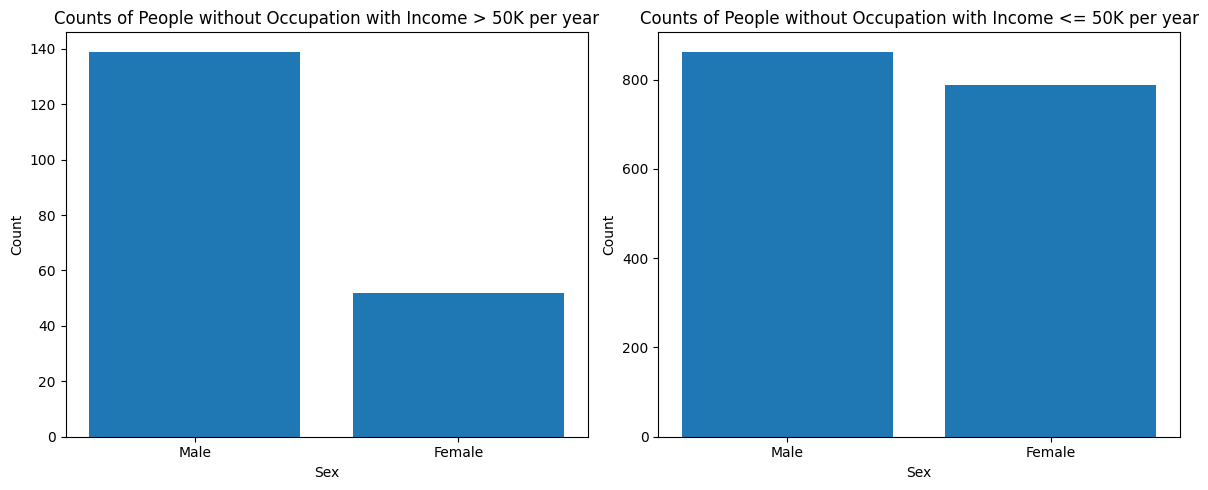

In [130]:
# Males and Females who doesn't have occupation record but but the income per year > 50k plot
high_income_jobless_people = people_without_occupation[people_without_occupation['income-per-year'] == '>50K']

# Males and Females who doesn't have occupation record but but the income per year <= 50k plot
low_income_jobless_people  = people_without_occupation[people_without_occupation['income-per-year'] == '<=50K']


# Creating a subplot inorder to show them side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['Male', 'Female'], high_income_jobless_people['sex'].value_counts())
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].set_title('Counts of People without Occupation with Income > 50K per year')


axes[1].bar(['Male', 'Female'], low_income_jobless_people['sex'].value_counts())
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].set_title('Counts of People without Occupation with Income <= 50K per year')

plt.tight_layout()
plt.show()

To above plot we can see that that some people earn more than 50k even they doesn't have any records about their occupation or the workclass. But there are some people who doesn't have occupation as well as doesn't earn 50k per year. Therefore first let's get rid of them values. We can fill those values with none but we cannot completely sure that these people doesn't have any occupation or maybe the records of their occupations did not saved. Therefore dropping them is the best solution.

#### Dropping the rows which doesnt have any records of the occupation as well as  with the income <= 50K

In [131]:
adult_dataset = adult_dataset.drop(adult_dataset[(adult_dataset['occupation'].isna()) & (adult_dataset['income-per-year'] == '<=50K')].index)

# Checking if we get rid of those values
adult_dataset[(adult_dataset['occupation'].isna()) & (adult_dataset['income-per-year'] == '<=50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year


Well We can see that those data points are completely gone. Lets consider the other values need to be handled.
1. People who doesn't have a occupation record and the year income is greater than 50K.
2. People who doesn't have a native-country record.

In [132]:
# Lets take the percentage of people who doesn't have occupation and earn more than 50k.
high_income_people  = adult_dataset[adult_dataset['income-per-year'] == '>50K']
high_income_jobless_people_percentage = (high_income_jobless_people['sex'].value_counts() / high_income_people['sex'].value_counts()) * 100
print(high_income_jobless_people_percentage)
print(f'total = {high_income_jobless_people_percentage.sum()}')

sex
 Male      2.087087
 Female    4.410517
Name: count, dtype: float64
total = 6.497604474703711


Its like 6.5 percent of the total number of records with the people who earn more than 50K per year. we cannot remove those values because the ratio between the earnings more than 50K is kind of large. Therefore Lets choose a method to fill those values practically and domain-wise acceptable.

Ways of filling the data.

1. Fill values with mode
2. Try building a prediction model to predict the occupation based on the given features.

In [141]:
# Mode of the occupations with people who have higher income.
mode_occupation_G50K = adult_dataset[adult_dataset['income-per-year'] == '>50K']['occupation'].mode()
print(mode_occupation_G50K)

# Other Occupation of other higher income people
print(adult_dataset[adult_dataset['income-per-year'] == '>50K']['occupation'])

0     Exec-managerial
Name: occupation, dtype: object
7           Exec-managerial
8            Prof-specialty
9           Exec-managerial
10          Exec-managerial
11           Prof-specialty
                ...        
32539                   NaN
32545          Adm-clerical
32554       Exec-managerial
32557     Machine-op-inspct
32560       Exec-managerial
Name: occupation, Length: 7839, dtype: object


#### Filling the Occupation of higher income people based on occupation mode

In [143]:
# Filling the occupation data column
adult_dataset['occupation'].fillna(mode_occupation_G50K.values[0],inplace=True)

# Checking the not null count of the occupation now
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30885 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30885 non-null  object
 1   workclass        30694 non-null  object
 2   fnlwgt           30885 non-null  object
 3   education        30885 non-null  object
 4   education-num    30885 non-null  object
 5   marital-status   30885 non-null  object
 6   occupation       30885 non-null  object
 7   relationship     30885 non-null  object
 8   race             30885 non-null  object
 9   sex              30885 non-null  object
 10  capital-gain     30885 non-null  object
 11  capital-loss     30885 non-null  object
 12  hours-per_week   30885 non-null  object
 13  native-country   30326 non-null  object
 14  income-per-year  30885 non-null  object
dtypes: object(15)
memory usage: 3.8+ MB


You can see that now the occupation column is filled and ready to continue with the mode of the occupation of higher-income people __(>50K)__